In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
# 对pandas和matplotlib 的显示设置
pd.set_option('display.max_columns', 30)
plt.rcParams.update({"font.family":"SimHei","font.size":14})
plt.style.use("tableau-colorblind10")


# # matplotlib支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

### 数据清洗
清洗步骤： 数据类型检查 压缩数据 * 空值处理

In [2]:
# load data
#data_user_log = pd.read_csv("user_log_format1.csv")  # 初次导入数据时启用
data_user_info = pd.read_csv("user_info_format1.csv")
data_train = pd.read_csv("train_format1.csv")
data_test = pd.read_csv("test_format1.csv")
gc.collect()

0

压缩内存：调整数据类型，将原来int64调整为合适的大小，例如:int32、int16、int8，以达到压缩内存的目的。

In [3]:
# 二次导入数据时，指定数据类型以压缩内存
d_types = {'user_id': 'int32', 'item_id': 'int32', 'cat_id': 'int16', 'seller_id': 'int16', 'brand_id': 'float32', 'time_stamp': 'int16', 'action_type': 'int8'}
data_user_log = pd.read_csv("user_log_format1.csv",dtype = d_types)
# check tables
display(data_user_log.head(1))
display(data_user_info.head(1))
display(data_train.head(1))
display(data_test.head(1))
gc.collect()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0


,user_id,age_range,gender
0,376517,6.0,1.0


,user_id,merchant_id,label
0,34176,3906,0


,user_id,merchant_id,prob
0,163968,4605,NaN


5

### 数据类型检查

In [4]:
# check table info
display(data_user_log.info())
display(data_user_info.info())
display(data_train.info())
display(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int32  
 1   item_id      int32  
 2   cat_id       int16  
 3   seller_id    int16  
 4   brand_id     float32
 5   time_stamp   int16  
 6   action_type  int8   
dtypes: float32(1), int16(3), int32(2), int8(1)
memory usage: 995.2 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int64  
 1   age_range  421953 non-null  float64
 2   gender     417734 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int64
 1   merchant_id  260864 non-null  int64
 2   label        260864 non-null  int64
dtypes: int64(3)
memory usage: 6.0 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261477 entries, 0 to 261476
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      261477 non-null  int64  
 1   merchant_id  261477 non-null  int64  
 2   prob         0 non-null       float64
dtypes: float64(1), int64(2)
memory usage: 6.0 MB


None

### 压缩数据

In [5]:
# 拼接train、test数据，方便下一步提取特征
data_train["origin"] = "train"
data_test["origin"] = "test"
data = pd.concat([data_train,data_test],sort = False)
data = data.drop(["prob"],axis = 1)
data.info()
gc.collect()

<class 'pandas.core.frame.DataFrame'>
Index: 522341 entries, 0 to 261476
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      522341 non-null  int64  
 1   merchant_id  522341 non-null  int64  
 2   label        260864 non-null  float64
 3   origin       522341 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 19.9+ MB


0

In [6]:
# 所有列都是数值型，直接downcast
# 初次压缩时，对所有数据集进行压缩
list = [data,data_user_log,data_user_info]

In [7]:
# 二次导入时无需重复data_user_log压缩
list = [data,data_user_info]

In [8]:
for df in list:
    fcols = df.select_dtypes('float').columns
    icols = df.select_dtypes('integer').columns
    df[fcols] = df[fcols].apply(pd.to_numeric, downcast='float')
    df[icols] = df[icols].apply(pd.to_numeric, downcast='integer')
# check table info again
display(data_user_log.info())
display(data_user_info.info())
display(data.info())
gc.collect()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int32  
 1   item_id      int32  
 2   cat_id       int16  
 3   seller_id    int16  
 4   brand_id     float32
 5   time_stamp   int16  
 6   action_type  int8   
dtypes: float32(1), int16(3), int32(2), int8(1)
memory usage: 995.2 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int32  
 1   age_range  421953 non-null  float32
 2   gender     417734 non-null  float32
dtypes: float32(2), int32(1)
memory usage: 4.9 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 522341 entries, 0 to 261476
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      522341 non-null  int32  
 1   merchant_id  522341 non-null  int16  
 2   label        260864 non-null  float32
 3   origin       522341 non-null  object 
dtypes: float32(1), int16(1), int32(1), object(1)
memory usage: 13.0+ MB


None

0

In [9]:
# 记录数据类型，二次导入时用
d_col = data_user_log.dtypes.index
d_type = [i.name for i in data_user_log.dtypes.values]
column_dict = dict(zip(d_col,d_type))
print(column_dict)

# 统一字段名
data_user_log.rename(columns = {"seller_id":"merchant_id"},inplace = True)
gc.collect()

{'user_id': 'int32', 'item_id': 'int32', 'cat_id': 'int16', 'seller_id': 'int16', 'brand_id': 'float32', 'time_stamp': 'int16', 'action_type': 'int8'}


0

### 空值处理

In [10]:
# 年龄、性别列存在null值，填补空值
data_user_info["age_range"].fillna(0,inplace = True)  # 0和null代表未知
data_user_info["gender"].fillna(0,inplace = True)  # 2和null代表未知

data_user_info.info()
gc.collect()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    424170 non-null  int32  
 1   age_range  424170 non-null  float32
 2   gender     424170 non-null  float32
dtypes: float32(2), int32(1)
memory usage: 4.9 MB


C:\Users\12594\AppData\Local\Temp\ipykernel_39692\4157245246.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_user_info["age_range"].fillna(0,inplace = True)  # 0和null代表未知
C:\Users\12594\AppData\Local\Temp\ipykernel_39692\4157245246.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

0

In [11]:
# 检查user_log空值
data_user_log.isna().sum()

user_id            0
item_id            0
cat_id             0
merchant_id        0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [12]:
# brand_id列有较多空值，以0填充
data_user_log["brand_id"].fillna(0, inplace = True)
gc.collect()

C:\Users\12594\AppData\Local\Temp\ipykernel_39692\3582130744.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_user_log["brand_id"].fillna(0, inplace = True)


12

### 数据初步探索

C:\Users\12594\AppData\Local\Temp\ipykernel_39692\851446926.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="age_range", y="count", data=age, palette="Blues")


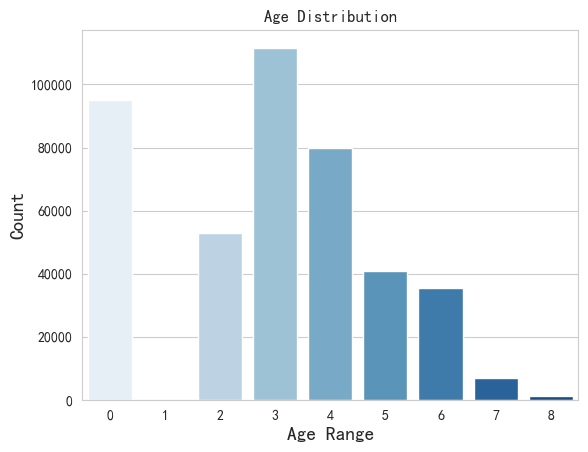

159

In [13]:
# 用户年龄分布
# 补全0-8的年龄范围，填充缺失值为0
full_age = pd.Index(range(9), name='age_range')
tags = data_user_info.age_range.value_counts().reindex(full_age, fill_value=0).sort_index()

# 创建DataFrame并标准化列名
age = pd.DataFrame({'age_range': tags.index, 'count': tags.values})

# 绘图
ax = sns.barplot(x="age_range", y="count", data=age, palette="Blues")
ax.set_title('Age Distribution', fontsize=12)
ax.set_xlabel('Age Range')
ax.set_ylabel('Count')
ax.tick_params(labelsize=10)

plt.show()
gc.collect()

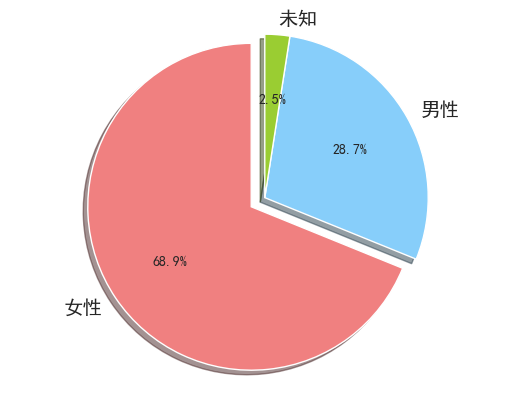

11

In [14]:
# 用户性别分布
sizes = data_user_info.gender.value_counts().sort_index()

labels = ['女性', '男性', '未知']
colors = ['lightcoral', 'lightskyblue',  'yellowgreen']
explode = (0.1, 0, 0)

patches,l_text,p_text = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
for t in l_text:
    t.set_size(14)
for t in p_text:
    t.set_size(10)
plt.show()
gc.collect()

用户年龄1表示<18岁，2表示18-24岁，3表示25-29岁，4表示30-34岁，5表示35-39岁，6表示40-49岁，7、8表示50岁以上，0表示未知。
性别0表示女性，1表示男性，2表示未知。
可以看出用户主要集中在25-29岁，女性较多。
出于隐私保护，数据采样存在部分偏差，结果并不代表天猫实际情况。

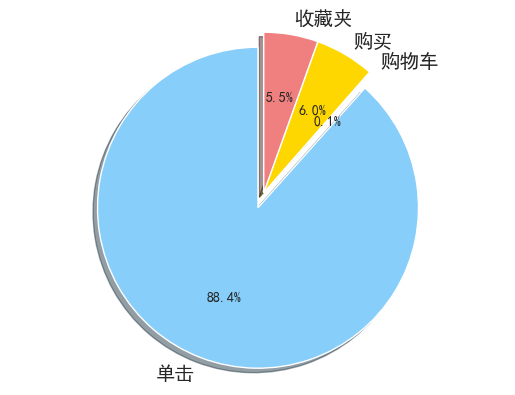

2414

In [15]:
# 用户操作类型分布
sizes = data_user_log.action_type.value_counts().sort_index()
# tags.plot.bar()
labels = ['单击', '购物车', '购买', '收藏夹']  # 定义标签
colors = ['lightskyblue', 'yellowgreen', 'gold', 'lightcoral']  # 每一块的颜色
explode = (0.1, 0, 0, 0)  # 突出显示，这里仅仅突出显示第二块（即'Hogs'）

patches,l_text,p_text = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # 显示为圆（避免比例压缩为椭圆）
for t in l_text:
    t.set_size(14)
for t in p_text:
    t.set_size(10)
plt.show()
gc.collect()

操作类型中0表示单击，1表示添加到购物车，2表示购买，3表示添加到收藏夹。
大部分用户都只是进行点击操作，添加购物车的比较少，多为直接购买或添加收藏夹。

### 构建特征
从业务上思考可能影响复购的因素有：
用户特征：年龄，性别，喜好的产品类型，购买习惯（网购频率、购买点击比等），喜欢尝鲜还是习惯固定店家购买 商家特征：产品结构，流量（用户交互频次、交互天数），口碑（购买点击比），产品评价（用户复购率） * 用户-商家特征：用户喜好与商家产品的相似性

因此我们针对用户、商家、用户-商家来分别构建以下特征： 交互次数、交互天数 交互过的商品、品类、品牌、用户/商家数 点击、加购物车、购买、收藏的操作次数 购买点击比 复购率 用户性别、年龄

### 用户特征

In [16]:
# 先生成 temp（假设 data_user_log 已定义）
groups = data_user_log.groupby(["user_id"])
temp = groups.size().reset_index().rename(columns={0: "u1"})

# 转换 user_id 类型
temp['user_id'] = temp['user_id'].astype('int64')
data['user_id'] = data['user_id'].astype('int64')

# 合并数据
data = pd.merge(data, temp, on="user_id", how="left")

# 检查结果
data.head(3)
gc.collect()

0

In [17]:
# 统计交互天数
temp = groups.time_stamp.nunique().reset_index().rename(columns = {"time_stamp":"u2"})
data = data.merge(temp,on ="user_id",how = "left")
data.head(3)
gc.collect()

0

In [18]:
# 统计交互过的商品、品类、品牌、商家数
temp = groups[['item_id','cat_id','merchant_id','brand_id']].nunique().reset_index().rename(columns={
    'item_id':'u3','cat_id':'u4','merchant_id':'u5','brand_id':'u6'})
data = data.merge(temp,on ="user_id",how = "left")
data.head(3)

,user_id,merchant_id,label,origin,u1,u2,u3,u4,u5,u6
0,34176,3906,0.0,train,451,47,256,45,109,108
1,34176,121,0.0,train,451,47,256,45,109,108
2,34176,4356,1.0,train,451,47,256,45,109,108


In [19]:
# 统计点击、加购物车、购买、收藏的操作次数
temp = groups['action_type'].value_counts().unstack().reset_index().rename(columns={0:'u7', 1:'u8', 2:'u9', 3:'u10'})
data = data.merge(temp,on ="user_id",how = "left")
data.head(3)

,user_id,merchant_id,label,origin,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10
0,34176,3906,0.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0
1,34176,121,0.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0
2,34176,4356,1.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0


In [20]:
# 统计购买点击比
data["u11"] = data["u9"]/data["u7"]
# 复购率 = 复购过的商家数/购买过的总商家数
# 按user_id,merchant_id分组，购买天数>1则复购标记为1，反之为0
groups_rb = data_user_log[data_user_log["action_type"]==2].groupby(["user_id","merchant_id"])
temp_rb = groups_rb.time_stamp.nunique().reset_index().rename(columns = {"time_stamp":"n_days"})
temp_rb["label_um"] = [(1 if x > 1 else 0) for x in temp_rb["n_days"]]

# 与data进行匹配
temp = temp_rb.groupby(["user_id","label_um"]).size().unstack(fill_value=0).reset_index()
temp["u12"] = temp[1]/(temp[0]+temp[1])

data = data.merge(temp[["user_id","u12"]],on ="user_id",how = "left")
data.head(3)
gc.collect()

12

In [21]:
# 性别、年龄独热编码处理
data = data.merge(data_user_info,on ="user_id",how = "left")

temp = pd.get_dummies(data["age_range"],prefix = "age")
temp2 = pd.get_dummies(data["gender"],prefix = "gender")

data = pd.concat([data,temp,temp2],axis = 1)
data.drop(columns = ["age_range","gender"],inplace = True)
data.head(3)
gc.collect()

12

### 商家特征

In [22]:
# 按merchant_id分组
groups = data_user_log.groupby(["merchant_id"])
# 统计交互总次数
temp = groups.size().reset_index().rename(columns = {0:"m1"})
data = pd.merge(data,temp, on ="merchant_id",how = "left")
data.head(3)
# 统计交互天数
temp = groups.time_stamp.nunique().reset_index().rename(columns = {"time_stamp":"m2"})
data = data.merge(temp,on ="merchant_id",how = "left")
data.head(3)
# 统计交互过的商品、品类、品牌、用户数
temp = groups[['item_id','cat_id','user_id','brand_id']].nunique().reset_index().rename(columns={
    'item_id':'m3','cat_id':'m4','user_id':'m5','brand_id':'m6'})
data = data.merge(temp,on ="merchant_id",how = "left")
data.head(3)
gc.collect()

12

In [23]:
# 统计点击、加购物车、购买、收藏的操作次数
temp = groups['action_type'].value_counts().unstack().reset_index().rename(columns={0:'m7', 1:'m8', 2:'m9', 3:'m10'})
data = data.merge(temp,on ="merchant_id",how = "left")
data.head(3)
gc.collect()

0

In [24]:
# 统计购买点击比
data["m11"] = data["m9"]/data["m7"]
# 复购率 = 复购过的用户数/购买过的总用户数
# 按user_id,merchant_id分组，购买天数>1则复购标记为1，反之为0（在上一步已计算）
# 与data进行匹配
temp = temp_rb.groupby(["merchant_id","label_um"]).size().unstack(fill_value=0).reset_index()
temp["m12"] = temp[1]/(temp[0]+temp[1])

data = data.merge(temp[["merchant_id","m12"]],on ="merchant_id",how = "left")
data.head(3)
gc.collect()

0

### 用户商家特征

In [25]:
# 按user_id,merchant_id分组
groups = data_user_log.groupby(['user_id','merchant_id'])
# 统计交互总次数
temp = groups.size().reset_index().rename(columns = {0:"um1"})
data = pd.merge(data,temp, on =["merchant_id","user_id"],how = "left")
data.head(3)

,user_id,merchant_id,label,origin,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,...,gender_1.0,gender_2.0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,um1
0,34176,3906,0.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0,0.082927,...,False,False,16269,185,308,20,5819,2,14870.0,28.0,410.0,961.0,0.027572,0.048387,39
1,34176,121,0.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0,0.082927,...,False,False,79865,185,1179,26,10931,2,72265.0,121.0,4780.0,2699.0,0.066145,0.053014,14
2,34176,4356,1.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0,0.082927,...,False,False,7269,155,67,15,2281,2,6094.0,16.0,963.0,196.0,0.158024,0.084444,18


In [26]:
# 统计交互天数
temp = groups.time_stamp.nunique().reset_index().rename(columns = {"time_stamp":"um2"})
data = data.merge(temp,on =["merchant_id","user_id"],how = "left")
data.head(3)

,user_id,merchant_id,label,origin,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,...,gender_2.0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,um1,um2
0,34176,3906,0.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0,0.082927,...,False,16269,185,308,20,5819,2,14870.0,28.0,410.0,961.0,0.027572,0.048387,39,9
1,34176,121,0.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0,0.082927,...,False,79865,185,1179,26,10931,2,72265.0,121.0,4780.0,2699.0,0.066145,0.053014,14,3
2,34176,4356,1.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0,0.082927,...,False,7269,155,67,15,2281,2,6094.0,16.0,963.0,196.0,0.158024,0.084444,18,2


In [27]:
# 统计交互过的商品、品类、品牌数
temp = groups[['item_id','cat_id','brand_id']].nunique().reset_index().rename(columns={
    'item_id':'um3','cat_id':'um4','brand_id':'um5'})
data = data.merge(temp,on =["merchant_id","user_id"],how = "left")
data.head(3)
gc.collect()

12

In [28]:
# 统计点击、加购物车、购买、收藏的操作次数
temp = groups['action_type'].value_counts().unstack().reset_index().rename(columns={0:'um6', 1:'um7', 2:'um8', 3:'um9'})
data = data.merge(temp,on =["merchant_id","user_id"],how = "left")
data.head(3)

,user_id,merchant_id,label,origin,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,...,m7,m8,m9,m10,m11,m12,um1,um2,um3,um4,um5,um6,um7,um8,um9
0,34176,3906,0.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0,0.082927,...,14870.0,28.0,410.0,961.0,0.027572,0.048387,39,9,20,6,1,36.0,NaN,1.0,2.0
1,34176,121,0.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0,0.082927,...,72265.0,121.0,4780.0,2699.0,0.066145,0.053014,14,3,1,1,1,13.0,NaN,1.0,NaN
2,34176,4356,1.0,train,451,47,256,45,109,108,410.0,NaN,34.0,7.0,0.082927,...,6094.0,16.0,963.0,196.0,0.158024,0.084444,18,2,2,1,1,12.0,NaN,6.0,NaN


In [29]:
# 统计购买点击比
data["um10"] = data["um8"]/data["um6"]
# 将提取好的特征保存，待下次读取
data.to_csv("data_features.csv",index=False)

### 建模预测
这里我们测试几种模型，并对比和观察各个模型的表现： 二元逻辑回归：针对二分类问题的经典模型，训练快 随机森林：可处理高维数据、大数据集，训练快 LightGBM：内存消耗少，可直接处理缺失值，训练快 XGBoost：支持并行化，通过正则化防止过拟合，可处理缺失值，适用于中低维数据

### 建模预处理

In [30]:
# # 读取之前储存的特征
data = pd.read_csv("data_features.csv")
data.info()
gc.collect()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522341 entries, 0 to 522340
Data columns (total 50 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      522341 non-null  int64  
 1   merchant_id  522341 non-null  int64  
 2   label        260864 non-null  float64
 3   origin       522341 non-null  object 
 4   u1           522341 non-null  int64  
 5   u2           522341 non-null  int64  
 6   u3           522341 non-null  int64  
 7   u4           522341 non-null  int64  
 8   u5           522341 non-null  int64  
 9   u6           522341 non-null  int64  
 10  u7           521981 non-null  float64
 11  u8           38179 non-null   float64
 12  u9           522341 non-null  float64
 13  u10          294859 non-null  float64
 14  u11          521981 non-null  float64
 15  u12          522341 non-null  float64
 16  age_0.0      522341 non-null  bool   
 17  age_1.0      522341 non-null  bool   
 18  age_2.0      522341 non-

12

In [31]:
# 数据压缩
fcols = data.select_dtypes('float').columns
icols = data.select_dtypes('integer').columns
data[fcols] = data[fcols].apply(pd.to_numeric, downcast='float')
data[icols] = data[icols].apply(pd.to_numeric, downcast='integer')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522341 entries, 0 to 522340
Data columns (total 50 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      522341 non-null  int32  
 1   merchant_id  522341 non-null  int16  
 2   label        260864 non-null  float32
 3   origin       522341 non-null  object 
 4   u1           522341 non-null  int16  
 5   u2           522341 non-null  int16  
 6   u3           522341 non-null  int16  
 7   u4           522341 non-null  int16  
 8   u5           522341 non-null  int16  
 9   u6           522341 non-null  int16  
 10  u7           521981 non-null  float32
 11  u8           38179 non-null   float32
 12  u9           522341 non-null  float32
 13  u10          294859 non-null  float32
 14  u11          521981 non-null  float32
 15  u12          522341 non-null  float32
 16  age_0.0      522341 non-null  bool   
 17  age_1.0      522341 non-null  bool   
 18  age_2.0      522341 non-

In [32]:
# 部分列存在许多没有匹配的空值，将空值填充为0
data.fillna(0, inplace = True)
# 拆分train、test数据集
train = data[data["origin"]=="train"].drop(["origin"],axis = 1)
test = data[data["origin"]=="test"].drop(["origin","label"],axis = 1)
X,Y = train.drop(['label'],axis=1),train['label']
# 拆分训练集与验证集
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y = train_test_split(X,Y,test_size=0.2)
# 计算train、valid集里正样本比例
print("Ratio of positive samples in train dataset:",train_y.mean())
print("Ratio of positive samples in valid dataset:",valid_y.mean())
gc.collect()

Ratio of positive samples in train dataset: 0.06095615
Ratio of positive samples in valid dataset: 0.061928585


0


Validation Accuracy: 0.6886128840588044

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     48942
         1.0       0.11      0.55      0.18      3231

    accuracy                           0.69     52173
   macro avg       0.53      0.62      0.49     52173
weighted avg       0.91      0.69      0.77     52173



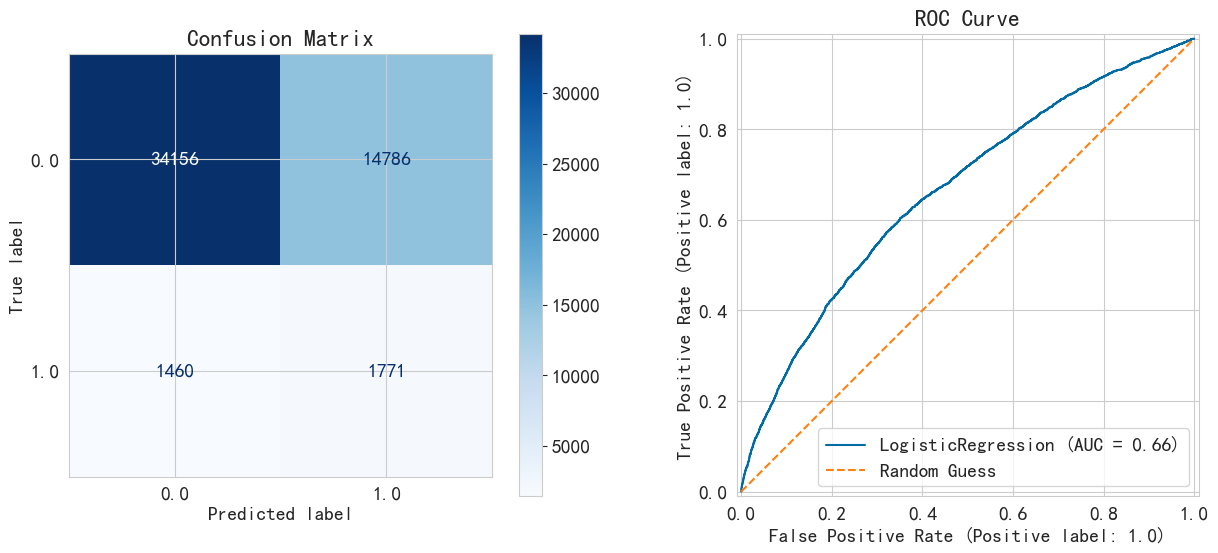

3909

In [33]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    classification_report
)
# 1. 数据标准化（逻辑回归对特征尺度敏感）
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
valid_x_scaled = scaler.transform(valid_x)  # 使用训练集的均值和方差

# 2. 初始化并训练逻辑回归模型（优化参数）
model = LogisticRegression(
    penalty='l2',
    C=0.1,                # 更小的C增强正则化，防止过拟合
    solver='lbfgs',
    max_iter=1000,
    random_state=42,
    class_weight='balanced' if train_y.mean() < 0.3 else None  # 自动处理不平衡
)
model.fit(train_x_scaled, train_y)

# 3. 验证集预测
valid_pred = model.predict(valid_x_scaled)
valid_proba = model.predict_proba(valid_x_scaled)[:, 1]  # 正类概率

# 4. 评估指标
print("\nValidation Accuracy:", accuracy_score(valid_y, valid_pred))
print("\nClassification Report:\n", classification_report(valid_y, valid_pred))

# 5. 可视化
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# 混淆矩阵
cm = confusion_matrix(valid_y, valid_pred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix')

# ROC曲线
RocCurveDisplay.from_estimator(model, valid_x_scaled, valid_y, ax=ax[1])
ax[1].plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
ax[1].set_title('ROC Curve')
plt.legend()
plt.show()
gc.collect()

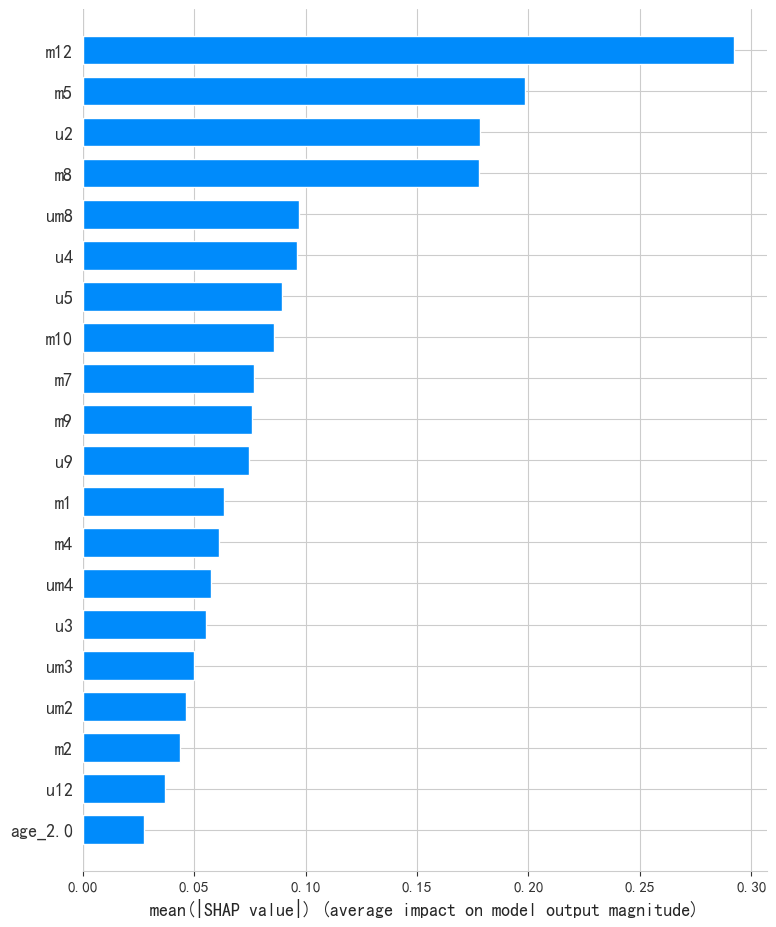

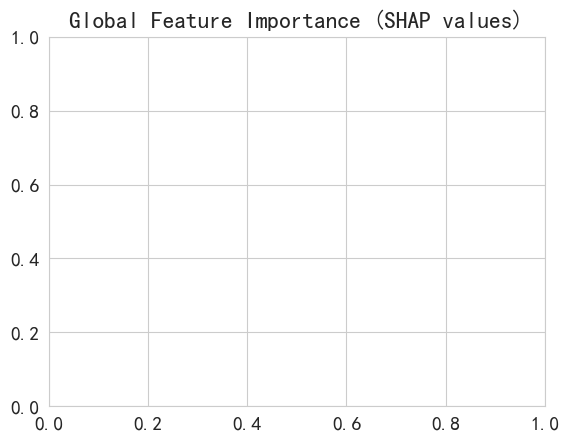

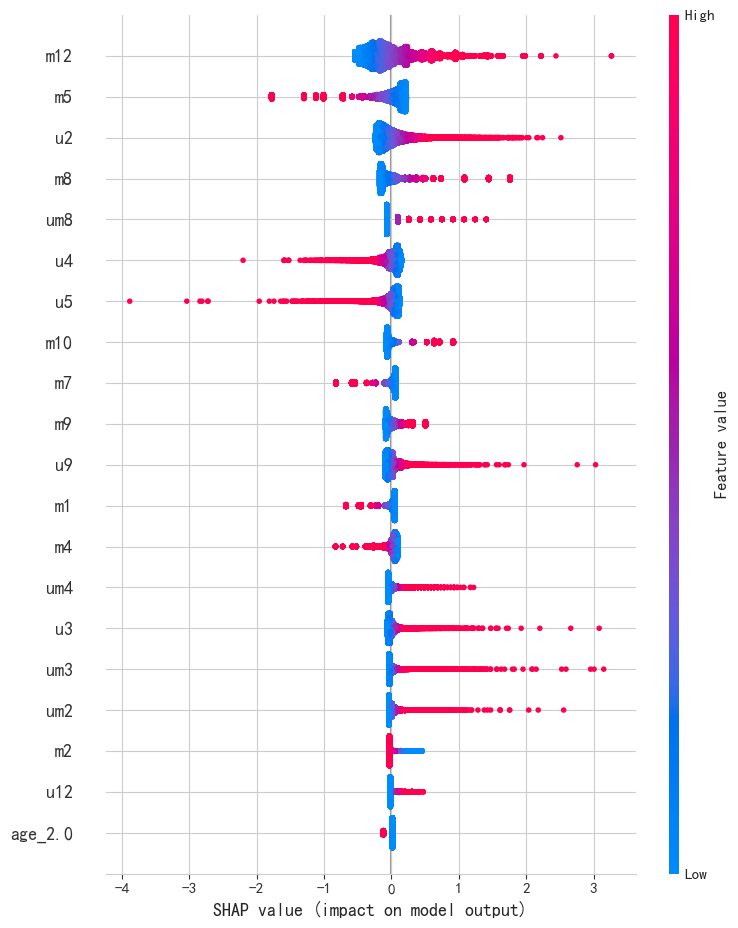

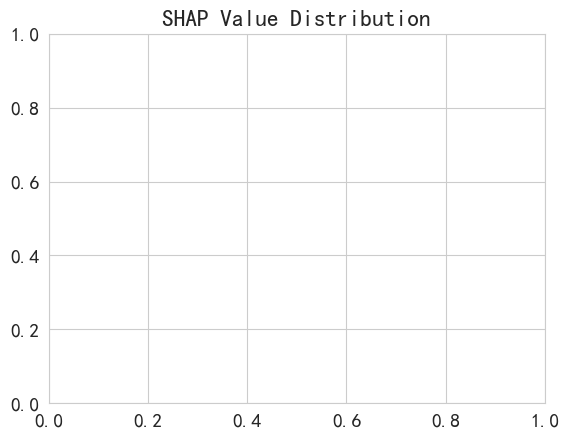

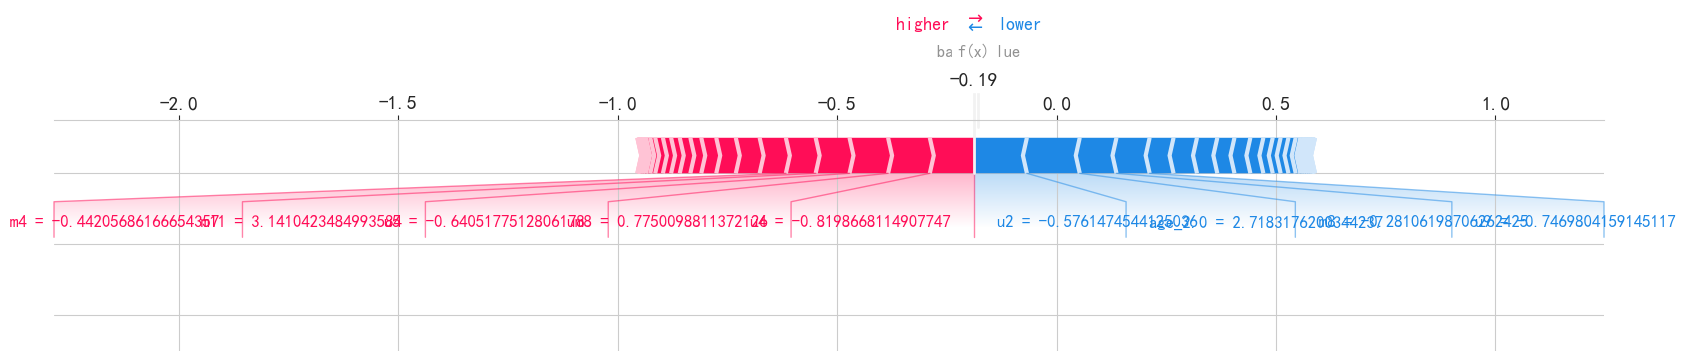

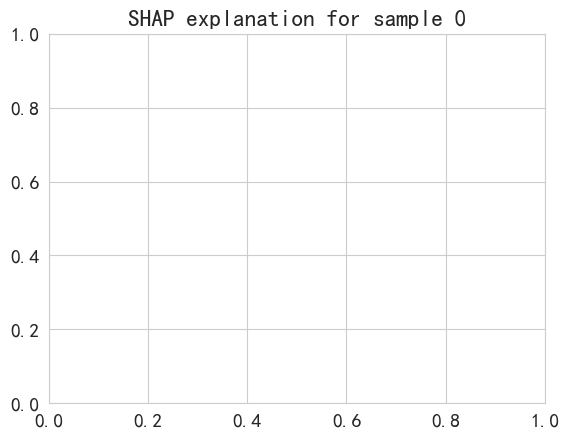

29700

In [34]:
import shap

# 创建SHAP解释器（逻辑回归使用线性解释器）
explainer = shap.LinearExplainer(
    model,  # 你训练好的逻辑回归模型
    train_x_scaled,  # 标准化后的训练数据
    feature_names=X.columns.tolist()  # 传入特征名称
)

# 计算验证集的SHAP值（使用标准化后的数据）
shap_values = explainer.shap_values(valid_x_scaled)

# 可视化1：全局特征重要性
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values,
                 valid_x_scaled,
                 feature_names=X.columns,
                 plot_type="bar")
plt.title("Global Feature Importance (SHAP values)")
plt.show()

# 可视化2：详细SHAP值分布
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values,
                 valid_x_scaled,
                 feature_names=X.columns,
                 plot_type="dot")
plt.title("SHAP Value Distribution")
plt.show()

# 可视化3：单个样本解释（以验证集第一个样本为例）
sample_idx = 0
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx],
    valid_x_scaled[sample_idx],
    feature_names=X.columns,
    matplotlib=True
)
plt.title(f"SHAP explanation for sample {sample_idx}")
plt.show()

gc.collect()


train、valid集正样本比例基本一致。

### 线性svm

In [35]:
# import libraries
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import roc_auc_score

In [36]:
# 处理类别不平衡（可选）
from imblearn.over_sampling import SMOTE
import gc
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(train_x, train_y)

# 处理缺失值（示例）
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
gc.collect()

0

In [37]:
# 改用随机搜索（适合大参数空间）
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier  # 适合大数据的模型
# 设置子样本比例（例如10%）
subsample_ratio = 0.1

# 随机抽取子样本
X_sub, _, y_sub, _ = train_test_split(
    X_res,  # 如果已经用SMOTE处理过，建议使用X_res/y_res
    y_res,
    train_size=subsample_ratio,
    random_state=42,
    stratify=y_res  # 保持类别平衡（如果数据不平衡）
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 数据标准化
    ('model', SGDClassifier(random_state=42))  # 使用随机梯度下降分类器（适合大数据）
])
from scipy.stats import loguniform

param_grid = {
    'model__alpha': loguniform(1e-5, 1e-1),  # 对数均匀分布采样正则化参数
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__learning_rate': ['constant', 'optimal', 'invscaling'],
    'model__eta0': [0.01, 0.1, 0.5],  # 初始学习率
}

from sklearn.model_selection import RandomizedSearchCV
# 初始化随机搜索
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)
# 在子样本上训练
random_search.fit(X_sub, y_sub)

# 输出最佳参数
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'model__alpha': 1.1299516083106613e-05, 'model__eta0': 0.01, 'model__learning_rate': 'optimal', 'model__penalty': 'l1'}


In [38]:
gc.collect()

26

In [39]:
#使用optuna进行贝叶斯优化
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 定义Optuna目标函数（使用X_res/y_res，即SMOTE后的数据）
def objective(trial):
    # 定义超参数搜索空间（适配SGDClassifier）
    params = {
        'model__alpha': trial.suggest_float('alpha', 1e-5, 1e-1, log=True),
        'model__penalty': trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet']),
        'model__learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling']),
        'model__eta0': trial.suggest_float('eta0', 0.01, 0.5, log=True),
        'model__max_iter': trial.suggest_int('max_iter', 500, 2000)
    }

    # 复用Pipeline结构
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', SGDClassifier(random_state=42))
    ])

    # 设置参数并评估性能（使用交叉验证代替单次拆分）
    pipeline.set_params(**params)
    score = cross_val_score(
        pipeline,
        X_res,  # 使用完整的SMOTE后训练数据
        y_res,
        cv=3,    # 交叉验证折数
        scoring='accuracy',  # 可改为roc_auc/f1等
        n_jobs=-1
    ).mean()

    return score

# 创建并运行优化
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # 可根据计算资源调整n_trials

# 输出最佳参数
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)
gc.collect()

[I 2025-03-13 17:19:56,615] A new study created in memory with name: no-name-9fed0517-158d-4d39-a642-90dc8d875dbb
[I 2025-03-13 17:20:00,520] Trial 0 finished with value: 0.9138363741024768 and parameters: {'alpha': 6.93255296432506e-05, 'penalty': 'l2', 'learning_rate': 'optimal', 'eta0': 0.051693905210044425, 'max_iter': 1687}. Best is trial 0 with value: 0.9138363741024768.
[I 2025-03-13 17:20:04,026] Trial 1 finished with value: 0.9138695424185315 and parameters: {'alpha': 0.0004957233252052891, 'penalty': 'l1', 'learning_rate': 'optimal', 'eta0': 0.03136045750571138, 'max_iter': 876}. Best is trial 1 with value: 0.9138695424185315.
[I 2025-03-13 17:20:06,694] Trial 2 finished with value: 0.9138695424185315 and parameters: {'alpha': 0.043094413442627155, 'penalty': 'l2', 'learning_rate': 'optimal', 'eta0': 0.25280100450187054, 'max_iter': 825}. Best is trial 1 with value: 0.9138695424185315.
[I 2025-03-13 17:20:16,483] Trial 3 finished with value: 0.9429224388465034 and parameters:

Best parameters: {'alpha': 1.358186286083904e-05, 'penalty': 'l1', 'learning_rate': 'optimal', 'eta0': 0.032851469899636575, 'max_iter': 1627}
Best accuracy: 0.9583687075490924


1591

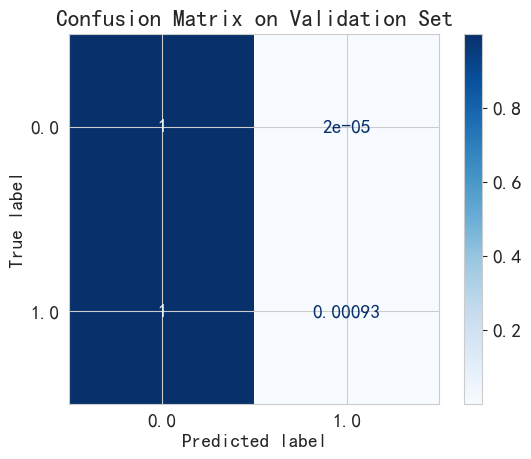

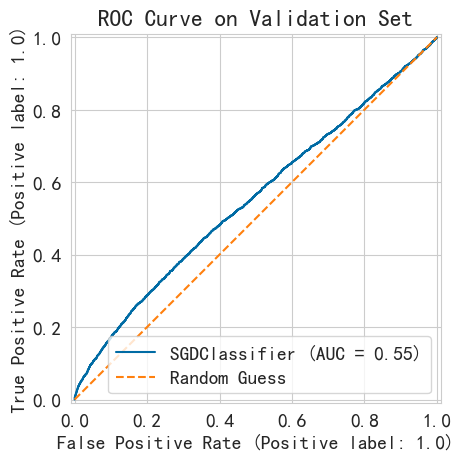

7712

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# 使用最佳模型预测验证集
pipeline.fit(X_res, y_res)  # 先在完整SMOTE数据上训练（如果尚未训练）

# 绘制混淆矩阵（直接使用Pipeline，无需手动标准化数据）
ConfusionMatrixDisplay.from_estimator(
    pipeline,
    valid_x,  # 使用验证集数据
    valid_y,
    cmap='Blues',
    normalize='true'  # 可选：显示归一化后的比例
)
plt.title('Confusion Matrix on Validation Set')

# 绘制ROC曲线
RocCurveDisplay.from_estimator(
    pipeline,
    valid_x,
    valid_y,
    name='SGDClassifier'
)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title('ROC Curve on Validation Set')
plt.legend()
plt.show()
gc.collect()


### 随机森林

In [41]:
from sklearn.ensemble import RandomForestClassifier
# 使用默认参数建模
model = RandomForestClassifier()
model.fit(train_x,train_y)
RandomForestClassifier()
# evaluate model
auc_rf = roc_auc_score(valid_y,model.predict_proba(valid_x)[:,1])
print('accuracy：',model.score(valid_x,valid_y))
print('roc_auc：',auc_rf)
gc.collect()

accuracy： 0.9379372472351599
roc_auc： 0.6481764378760926


66

In [44]:
gc.collect()

1348

In [45]:
# 调参
RF = RandomForestClassifier()
params = {"n_estimators":[50,100],
          "max_depth":[5,10,100],
          "min_samples_split":[2,10,500],
          "min_samples_leaf":[1,50,100]
         }

grid_search = GridSearchCV(RF,params,cv = 3,scoring = "roc_auc")
grid_search.fit(train_x,train_y)
# 调参后的最优参数结果
display(grid_search.best_params_)
display(grid_search.best_score_)
# evaluate the model
# model = grid_search.best_estimator_

# 二次计算时，直接使用最优参数建模
RF = RandomForestClassifier(max_depth=100,min_samples_leaf=50,min_samples_split=10)
RF.fit(train_x,train_y)


auc_rf = roc_auc_score(valid_y,RF.predict_proba(valid_x)[:,1])
print('accuracy：',RF.score(valid_x,valid_y))
print('roc_auc：',auc_rf)
gc.collect()

{'max_depth': 100,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'n_estimators': 100}

0.677982391010216

accuracy： 0.9380714162497844
roc_auc： 0.6768168705455853


528

|重要性排名前三的特性为：商家用户复购率，用户购买点击比和用户-商家交互过的商品数。

In [46]:
# 进行预测
prob_rf = RF.predict_proba(test)[:,1]
prob_rf

array([0.08279662, 0.10798385, 0.07516159, ..., 0.09223881, 0.04896279,
       0.05518816])

In [ ]:
gc.collect()
import shap
import matplotlib.pyplot as plt

# 1. 创建SHAP解释器
explainer = shap.TreeExplainer(RF)  # 替换model为你的训练好的模型变量

# 2. 计算SHAP值（假设X_test是你的测试数据）
shap_values = explainer.shap_values(test)

# 3. 可视化分析
# 摘要图（显示特征重要性）
shap.summary_plot(shap_values, test, show=False)
plt.savefig('summary_plot.png')  # 保存为图片
plt.close()

# 条形图摘要（特征重要性排序）
shap.summary_plot(shap_values, test, plot_type="bar", show=False)
plt.savefig('bar_plot.png')
plt.close()

# 单个样本解释（例如第一个样本）
shap.initjs()  # 初始化JS（用于Notebook中的交互式显示）
force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    test.iloc[0, :] if hasattr(test, 'iloc') else test[0],
    matplotlib=True  # 设置为True生成静态图
)
plt.savefig('force_plot.png')
plt.close()

### SHAP值计算